**Inteligência Artificial**

**812839 - Vinícius Miranda de Araújo**

**Lista 02**

---
---


### **Questão 1**

---

Encontrar o padrão de pessoas que sobreviveram ao desastre do TITANIC, que matou mais de 1.500 pessoas em 1912. A base de dados está no CANVAS.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn import tree

# Ler o arquivo de treino
training_data = pd.read_csv( 'titanic/train.csv' )
# Ler o arquivo de teste
test_data = pd.read_csv( 'titanic/test.csv' )
# Ler o arquivo com a resposta correta do o conjunto de teste
truth_table = pd.read_csv( 'titanic/gender_submission.csv' )

# Adicionar coluna 'Survived' ao test_data
test_data = test_data.merge(truth_table, on='PassengerId', how='left')

# ------------------------------------
# --- Pre-processamentos de Dados
# ------------------------------------

# Remover colunas irrelevantes ou com muitos valores ausentes
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked']

# Transformação de dados categóricos
encoder = LabelEncoder()
training_data['Sex'] = encoder.fit_transform( training_data['Sex'] )
test_data['Sex']     = encoder.transform( test_data['Sex'] )

# Preenchendo valores ausentes
training_data['Age'] = training_data['Age'].fillna( training_data['Age'].median( ) )
test_data['Age']     = test_data['Age'].fillna( test_data['Age'].median( ) )

training_data['Fare'] = training_data['Fare'].fillna( training_data['Fare'].median( ) )
test_data['Fare']     = test_data['Fare'].fillna( test_data['Fare'].median( ) )

# Separar variáveis independentes e dependentes
X_treino = training_data.drop( columns = columns_to_drop + ['Survived'], axis = 1 ) # X_treino = colunas de treino
y_treino = training_data['Survived']                                                # y_treino = coluna de resposta

X_teste  = test_data.drop( columns = columns_to_drop + ['Survived'], axis = 1  )    # X_teste = colunas de teste
y_teste  = test_data['Survived']                                                    # y_teste = coluna de resposta

# ------------------------------------
# --- Descobrir melhores hiperparâmetros
# ------------------------------------

# Definição de hiperparâmetros para Decision Tree
params = {
    'criterion'        : ['gini', 'entropy'],
    'max_depth'        : [None, 2, 3, 4],
    'max_features'     : [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'min_samples_split': [20, 30, 40, 50]
}

# Encontrar melhores hiperparâmetros
modelo = GridSearchCV(
    estimator  = DecisionTreeClassifier( ),
    param_grid = params,
    cv         = 10,
    n_jobs     = 5,
    verbose    = 1,
)

# Treina o modelo com os dados de treino (X_treino e y_treino)
modelo.fit( X_treino, y_treino )
print( "Melhores hiperparâmetros..:", modelo.best_params_ )
print( "Melhor pontuação..........:", modelo.best_score_ )

# ------------------------------------
# --- Treinar o Modelo
# ------------------------------------

# Treinar modelo final com os melhores hiperparâmetros
modelo_final = DecisionTreeClassifier(
    max_depth         = 4,
    criterion         = 'gini',
    max_features      = modelo.best_params_['max_features'],
    min_samples_split = modelo.best_params_['min_samples_split'],
    random_state      = 42
)
modelo_final.fit( X_treino, y_treino )

# ------------------------------------
# --- Testar e Avaliar o Modelo
# ------------------------------------

# Resetar os índices dos DataFrames
X_treino = X_treino.reset_index( drop=True )
y_treino = y_treino.reset_index( drop=True )
X_teste  = X_teste.reset_index( drop=True )
y_teste  = y_teste.reset_index( drop=True )

# Fazer previsões
y_pred = modelo_final.predict( X_teste )

# Avaliar o modelo
print( "Acurácia do modelo........:", accuracy_score( y_teste, y_pred ) )
print( "Matriz de Confusão........:\n", confusion_matrix( y_teste, y_pred ) )
print( "Relatório de Classificação:\n", classification_report( y_teste, y_pred ) )

# Plotar a matriz de confusão
cm = ConfusionMatrix( modelo_final )
cm.fit( X_treino, y_treino )
cm.score( X_teste, y_teste )
cm.show( )  # Exibir a matriz de confusão

# Plotar a árvore de decisão
plt.figure( figsize = (20, 10) )
tree.plot_tree(
    modelo_final,
    feature_names = X_treino.columns,
    class_names   = ['Não Sobreviveu', 'Sobreviveu'],
    filled        = True,
    rounded       = True
)
plt.show( )  # Exibir a árvore de decisão

# Importância das features
importancias = modelo_final.feature_importances_
features     = pd.DataFrame( {'Feature': X_treino.columns, 'Importância': importancias} )
features     = features.sort_values( by='Importância', ascending=False )
print( features )

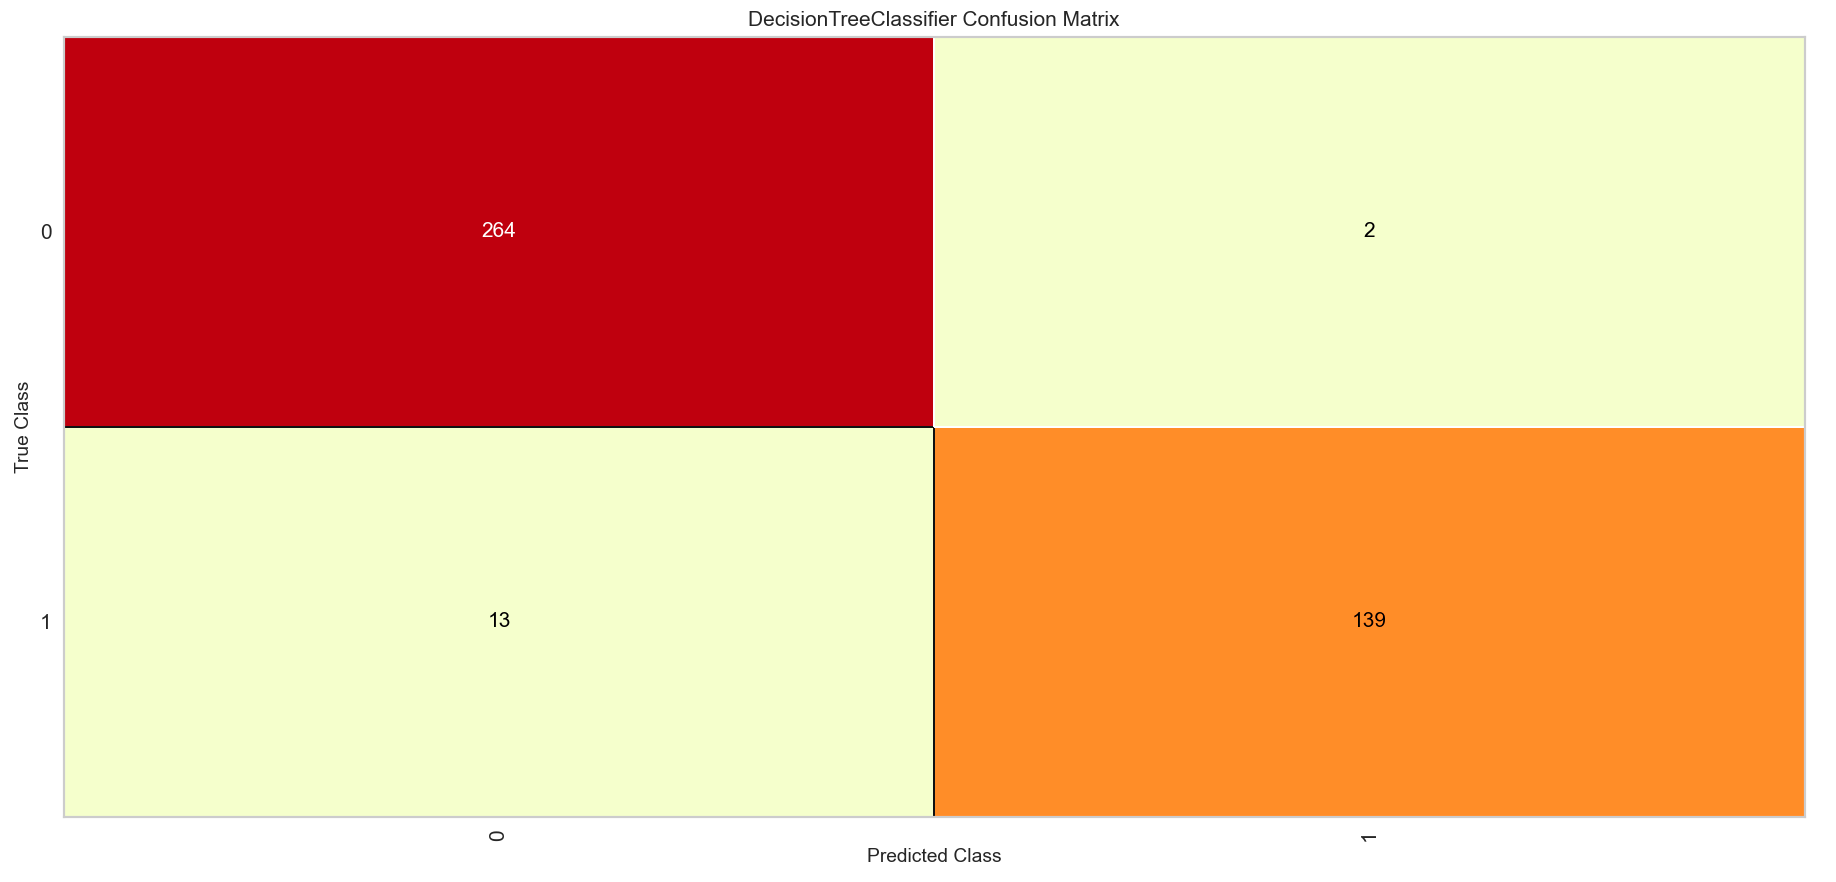
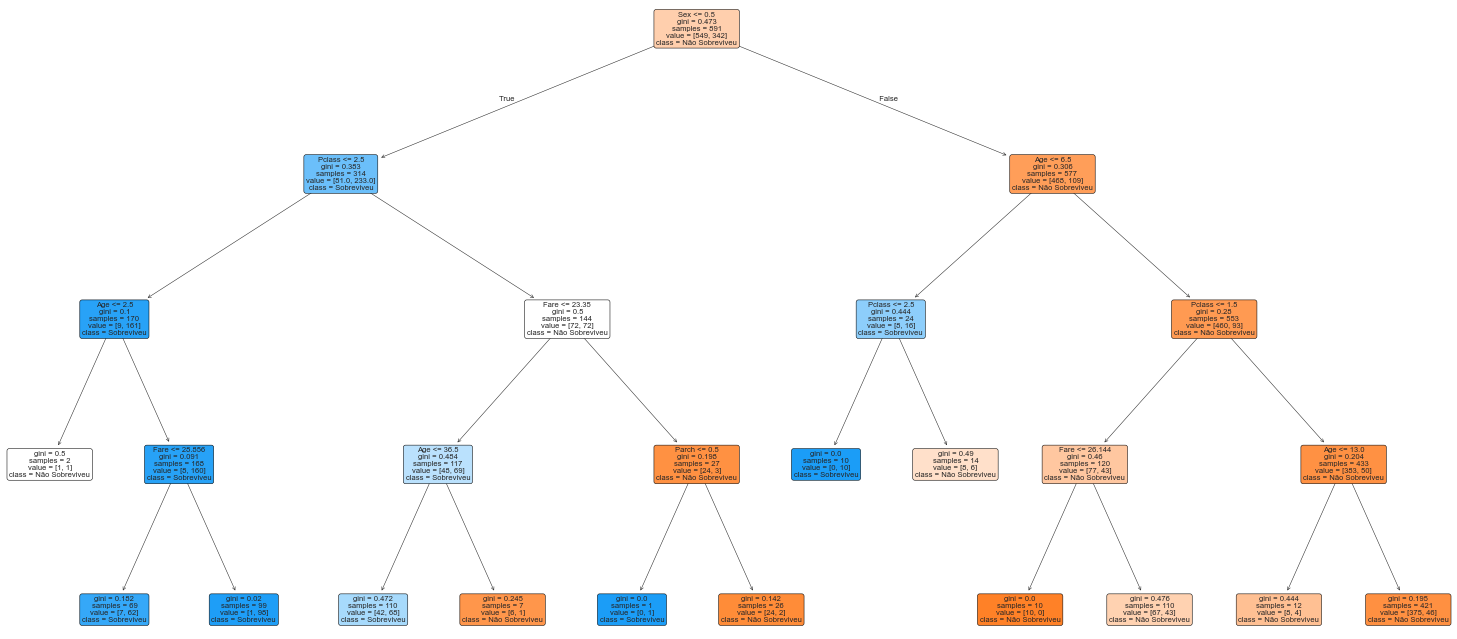

A árvore de decisão mostra os principais fatores que influenciaram a sobrevivência no Titanic:

1. **Sexo (Sex)**: O fator mais importante. Mulheres (Sex = 0) tinham muito mais chances de sobreviver.
2. **Classe da passagem (Pclass)**: Passageiros da 1ª classe tiveram maior taxa de sobrevivência do que os da 3ª.
3. **Idade (Age)**: Passageiros mais jovens tiveram mais chances de sobreviver, especialmente crianças.
4. **Número de parentes a bordo (SibSp, Parch)**: Pessoas com familiares a bordo tinham maior probabilidade de sobreviver.

|   | Feature | Importância |
|---|---------|-------------|
| 1 |     Sex |   0.615847  |
| 0 |  Pclass |   0.227955  |
| 2 |     Age |   0.081102  |
| 5 |    Fare |   0.066973  |
| 4 |   Parch |   0.008122  |
| 3 |   SibSp |   0.000000  |

### **Questão 2**

---

Considerando o artigo "A comparative study of decision tree ID3 and C4.5":

1. As principais diferenças entre os algoritmos ID3 e C4.5 são:

  - Tratamento de Dados Contínuos: O algoritmo ID3 não consegue lidar eficientemente com atributos contínuos, enquanto o C4.5 pode dividir atributos contínuos em intervalos, permitindo o uso de dados numéricos.

  - Tratamento de Valores Ausentes: O C4.5 pode lidar com valores ausentes de forma mais eficaz, o que não é uma capacidade do ID3.

  - Podas e Previsão Pessimista: C4.5 implementa técnicas de poda após a criação da árvore, tornando-a menos propensa ao overfitting. ID3, por outro lado, não possui uma estratégia de poda tão robusta.

  - Cálculo do Ganho de Informação: C4.5 melhora o cálculo do ganho de informação do ID3 introduzindo a razão de ganho, que ajuda a evitar o viés em atributos com muitos valores, um ponto fraco do ID3.

2. O algoritmo C4.5 lida com atributos de entrada que são numéricos dividindo esses atributos em intervalos. Durante o processo de construção da árvore, ele analisa os dados contínuos e determina os pontos de divisão que melhor segregam as classes, permitindo que a árvore utilize informações de atributos numéricos de maneira eficaz.

### **Questão 3**

---

Considerando a árvore que classifica o objeto nas classes: Iris_Setosa, Iris_Virgínica e Iris_Versicolor e que esta árvore foi gerada com os hiperparâmetros (DecisionTreeClassifier(criterion='gini', max_depth=3)),
usando a linguagem Python.

Qual as **saídas** da árvore para os seguintes **registros de teste**, respectivamente?


| Registros de teste | Tamanho da Pétala | Largura da Pétala | Tamanho da Sépala | Largura da Sépala |
|------------|------|------|------|------|
|Instância 1 | 3.46 | 0.87 | 2.45 | 1.78 |
|Instância 2 | 1.67 | 1.89 | 0.78 | 1.32 |
|Instância 3 | 2.56 | 2.34 | 2.45 | 1.78 |
|Instância 4 | 6.67 | 2.34 | 2.45 | 1.78 |

a) Iris_Virgínica, íris_Setosa, Iris_Versicolor, Iris_Virgínica

b) Iris_ Setosa, íris_Setosa, Iris_Virgínica , Iris_Versicolor

c) Iris_Versicolor, íris_Setosa, Iris_Versicolor, Iris_Virgínica

d) Íris_Setosa, Iris_Virgínica, Iris_Virgínica , Iris_Versicolor

e) Iris_Versicolor, Íris_Setosa, Iris_Versicolor, Íris_Setosa

**Resposta: Letra C**

### **Questão 4**

---

Considerando a árvore da questão anterior:

  I. Esta árvore possui 5 regras de classificação

  II. Das regras geradas, há apenas uma com cobertura por classe de 100%

  III. A menor cobertura por classe é de 6.8% e corresponde à classe Iris_Virgínica

É correto o que se afirma em:

a) I, apenas.

b) III, apenas.

c) I e II, apenas.

d) I e III, apenas.

e) I, II e III.

**Resposta: Letra A**

### **Questão 5**

---

Considere a seguinte matriz de confusão:

|   |  A |  B |  C |  D |
|---|----|----|----|----|
| A | 10 |  4 |  2 |  1 |
| B |  1 | 15 |  2 |  0 |
| C |  2 |  3 | 20 |  5 |
| D |  4 |  1 |  2 | 50 |

Quais os valores para as métricas abaixo para cada uma das classes A, B, C e D?

|   |  Precisão |  Recall | F1Score | TVP | TFN | TFP | TVN |
|---|-----------|---------|---------|-----|-----|-----|-----|
| A |     -     |    -    |    -    |  -  |  -  |  -  |  -  |
| B |     -     |    -    |    -    |  -  |  -  |  -  |  -  |
| C |     -     |    -    |    -    |  -  |  -  |  -  |  -  |
| D |     -     |    -    |    -    |  -  |  -  |  -  |  -  |

**Respostas: Executar o código abaixo**


In [ ]:
import numpy as np
import pandas as pd

def calcular_metricas( matrix_conf ):
    classes = ['A', 'B', 'C', 'D']
    metricas = {"Precisão": [], "Recall": [], "F1Score": [], "TVP": [], "TFN": [], "TFP": [], "TVN": []}

    total_amostras = np.sum( matrix_conf )
    soma_linhas    = np.sum( matrix_conf, axis=1 )
    soma_colunas   = np.sum( matrix_conf, axis=0 )

    for i, cls in enumerate(classes):
        VP = matrix_conf[i, i]                  # Verdadeiros positivos (Diagonal Principal)
        FN = soma_linhas[i] - VP                # Falsos negativos
        FP = soma_colunas[i] - VP               # Falsos positivos
        VN = total_amostras - ( VP + FN + FP )  # Verdadeiros negativos

        try:
            precisao = VP / (VP + FP) if (VP + FP) > 0 else None
            recall   = VP / (VP + FN) if (VP + FN) > 0 else None
            f1_score = 2 * (precisao * recall) / (precisao + recall) if (precisao and recall and (precisao + recall) > 0) else None
            tvp      = VP / (VP + FN) if (VP + FN) > 0 else None
            tfn      = FN / (VP + FN) if (VP + FN) > 0 else None
            tfp      = FP / (FP + VN) if (FP + VN) > 0 else None
            tvn      = VN / (FP + VN) if (FP + VN) > 0 else None
        except ZeroDivisionError:
            print( "Erro: impossível dividir por 0!" )

        metricas["Precisão"].append( precisao )
        metricas["Recall"].append( recall )
        metricas["F1Score"].append( f1_score )
        metricas["TVP"].append( tvp )
        metricas["TFN"].append( tfn )
        metricas["TFP"].append( tfp )
        metricas["TVN"].append( tvn )

    return pd.DataFrame(metricas, index=classes)
# calcular_metricas ( )

# --------------------------------------------
# --- Main
# --------------------------------------------

if __name__ == "__main__":
  matriz = np.array([[10, 4, 2, 1],
                     [1, 15, 2, 0],
                     [2, 3, 20, 5],
                     [4, 1, 2, 50]])

  df_metricas = calcular_metricas( matriz )
  print( df_metricas )


   Precisão    Recall   F1Score       TVP       TFN       TFP       TVN
A  0.588235  0.588235  0.588235  0.588235  0.411765  0.066667  0.933333
B  0.652174  0.833333  0.731707  0.833333  0.166667  0.076923  0.923077
C  0.769231  0.666667  0.714286  0.666667  0.333333  0.065217  0.934783
D  0.892857  0.877193  0.884956  0.877193  0.122807  0.092308  0.907692
